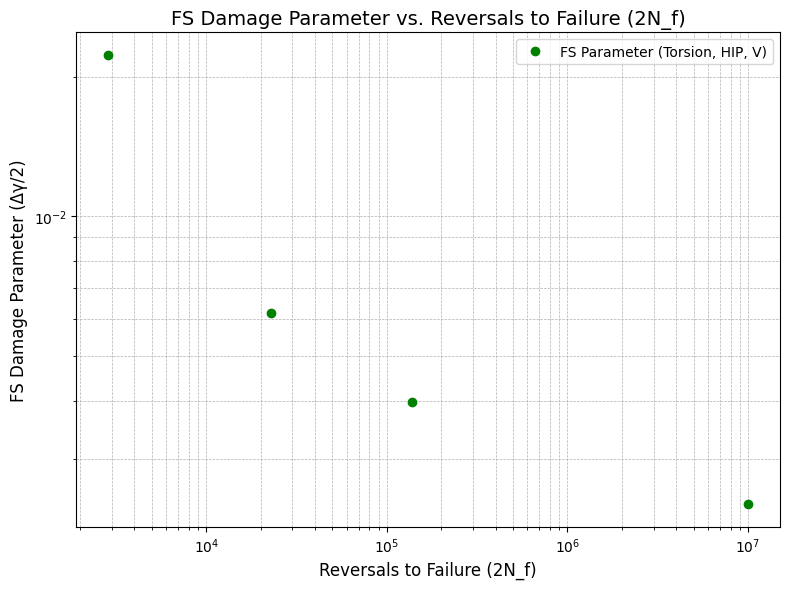

Reversals to failure (2N_f): 5744, FS Parameter (Δγ/2): 0.02231
Reversals to failure (2N_f): 45372, FS Parameter (Δγ/2): 0.00619
Reversals to failure (2N_f): 274724, FS Parameter (Δγ/2): 0.00397
Reversals to failure (2N_f): 20000000, FS Parameter (Δγ/2): 0.00239


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Given data from the table (Surface Δγ/2 (%) and reversals to failure)
delta_gamma_over_2 = np.array([0.934, 0.259, 0.166, 0.1])  # in percentage (%)
Nf = np.array([2872, 22686, 137362, 10000000])  # Reversals to failure

# Convert Δγ/2 from percentage to decimal
delta_gamma_over_2 = delta_gamma_over_2 / 100

# Given material properties
sigma_n_max = 487  # Example maximum normal stress, replace with real value
sigma_y = 526  # Yield strength in MPa (from the table)
k = 1.5  # Material-dependent parameter

# Calculate FS parameter using the left-hand side of the equation
def fs_parameter(delta_gamma_over_2, sigma_n_max, sigma_y, k):
    # FS parameter calculation
    fs_value = delta_gamma_over_2 * (1 + k * sigma_n_max / sigma_y)
    return fs_value

# Calculate FS parameter for each Nf
fs_parameters = fs_parameter(delta_gamma_over_2, sigma_n_max, sigma_y, k)

# Plot the FS parameter vs. Reversals to Failure (2N_f)
plt.figure(figsize=(8, 6))
plt.loglog(Nf, fs_parameters, 'go', label='FS Parameter (Torsion, HIP, V)')

# Add labels and title
plt.title('FS Damage Parameter vs. Reversals to Failure (2N_f)', fontsize=14)
plt.xlabel('Reversals to Failure (2N_f)', fontsize=12)
plt.ylabel('FS Damage Parameter (Δγ/2)', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

# Print the FS parameter results
for i, N in enumerate(Nf):
    print(f"Reversals to failure (2N_f): {2*N:.0f}, FS Parameter (Δγ/2): {fs_parameters[i]:.5f}")


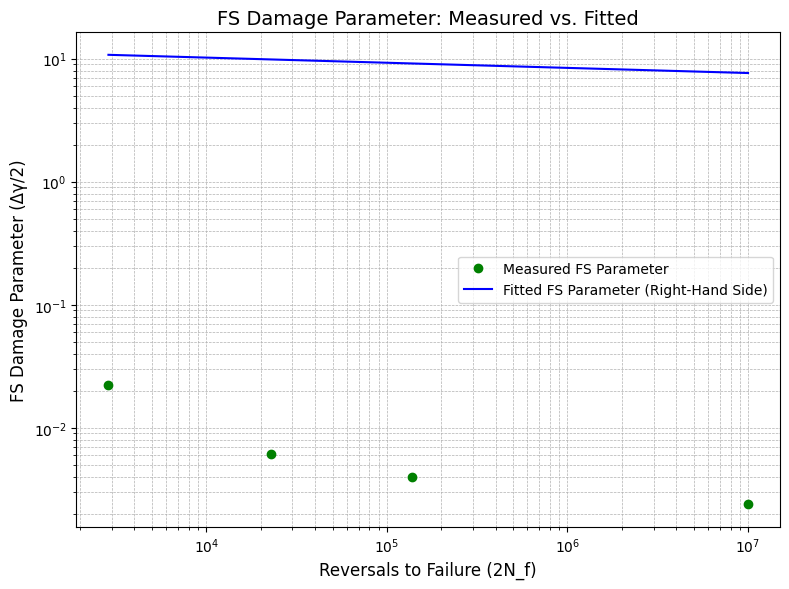

In [64]:
from scipy.optimize import curve_fit

# Material properties for the right-hand side calculation
tau_f_prime = 683  # Shear fatigue strength coefficient (τ'_f) in MPa
gamma_f_prime = 0.40  # Shear fatigue ductility coefficient (γ'_f)
b_0 = -0.0417  # Shear fatigue strength exponent
#b_0 = 2
c_0 = -0.481  # Shear fatigue ductility exponent
G = 45.7  # Shear modulus in MPa

def fs_fitting_function(N, tau_f_prime, G, gamma_f_prime, b_0, c_0):
    elastic_term = (tau_f_prime / G) * (N ** b_0)  # Elastic component
    plastic_term = gamma_f_prime * (N ** c_0)      # Plastic component
    return elastic_term + plastic_term

Nf_fit = np.logspace(np.log10(min(Nf)), np.log10(max(Nf)), 200)
# Generate data for plotting the fitted curve
fs_fitted = fs_fitting_function(Nf_fit, tau_f_prime, G, gamma_f_prime, b_0, c_0)

# Plotting the measured FS parameter vs. Reversals to Failure (2N_f)
plt.figure(figsize=(8, 6))
plt.loglog(Nf, fs_parameters, 'go', label='Measured FS Parameter')

# Plotting the fitted FS parameter (from the right-hand side)
plt.loglog(Nf_fit, fs_fitted, 'b-', label='Fitted FS Parameter (Right-Hand Side)')

# Add labels and title
plt.title('FS Damage Parameter: Measured vs. Fitted', fontsize=14)
plt.xlabel('Reversals to Failure (2N_f)', fontsize=12)
plt.ylabel('FS Damage Parameter (Δγ/2)', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Material properties for the right-hand side calculation
tau_f_prime = 683  # Shear fatigue strength coefficient (τ'_f) in MPa
gamma_f_prime = 0.40  # Shear fatigue ductility coefficient (γ'_f)
b_0 = -0.0417  # Shear fatigue strength exponent
#b_0 = 2
c_0 = -0.481  # Shear fatigue ductility exponent
G = 45.7  # Shear modulus in MPa

# Right-hand side of the FS equation (fitting function)
def fs_fitting_function(N, tau_f_prime, G, gamma_f_prime, b_0, c_0):
    elastic_term = (tau_f_prime / G) * (2 * N) ** b_0  # Elastic component
    plastic_term = gamma_f_prime * (2 * N) ** c_0      # Plastic component
    return elastic_term + plastic_term

# Fit the right-hand side to the measured FS parameter data
popt, _ = curve_fit(fs_fitting_function, Nf, delta_gamma_over_2)

# Generate data for plotting the fitted curve
Nf_fit = np.logspace(np.log10(min(Nf)), np.log10(max(Nf)), 200)
fs_fitted = fs_fitting_function(Nf_fit, *popt)

# Plotting the measured FS parameter vs. Reversals to Failure (2N_f)
plt.figure(figsize=(8, 6))
plt.loglog(Nf, delta_gamma_over_2, 'go', label='Measured FS Parameter')

# Plotting the fitted FS parameter (from the right-hand side)
plt.loglog(Nf_fit, fs_fitted, 'b-', label='Fitted FS Parameter (Right-Hand Side)')

# Add labels and title
plt.title('FS Damage Parameter: Measured vs. Fitted', fontsize=14)
plt.xlabel('Reversals to Failure (2N_f)', fontsize=12)
plt.ylabel('FS Damage Parameter (Δγ/2)', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

# Print fitted parameters
print("Fitted parameters for right-hand side FS equation:")
print(f"τ'_f: {popt[0]:.2f} MPa, G: {popt[1]:.2f} MPa, γ'_f: {popt[2]:.2f}, b_0: {popt[3]:.4f}, c_0: {popt[4]:.4f}")


TypeError: The number of func parameters=5 must not exceed the number of data points=4

In [50]:
(tau_f_prime / G) * (Nf ** b_0)

array([10.72255327,  9.83715236,  9.12547472,  7.63140502])

In [48]:
gamma_f_prime * (Nf ** c_0)

array([0.00868307, 0.00321322, 0.00135128, 0.00017181])